# 1 : SVM Classification [Credit card dataset](https://drive.google.com/file/d/1WNnml9QUjBTecDINe7OlhdawQwuFp_Pi/view?usp=sharing)

# 2 : 3D Plot On SVM(Non Linear)

# 3 : Different kernels in SVMs



#Importing librairies

In [ ]:
import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools # Functions creating iterators for efficient looping

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn

%matplotlib inline

# DataSet

In [ ]:
data = pd.read_csv('/content/creditcard.csv') # Reading the file .csv

#Data Visualization

In [ ]:
df = pd.DataFrame(data) # Converting data to Panda DataFrame
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


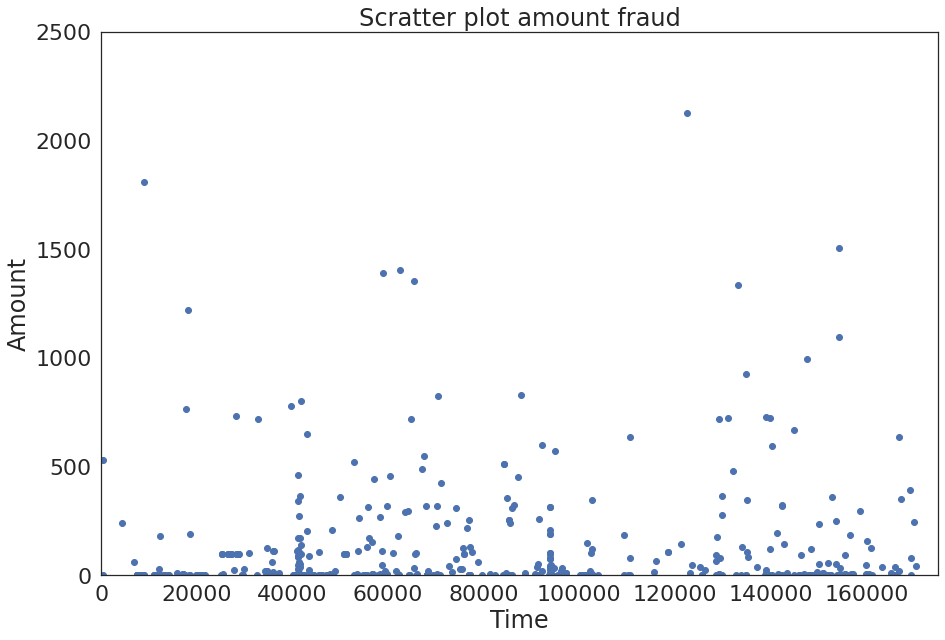

In [ ]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [ ]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(df_fraud.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


There are only 9 frauds where the amount was bigger than 1000 over 492 frauds

#Check for Unbalanced data

In [ ]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.

This dataset is unbalanced which means using the data as it is might result in unwanted behaviour from a supervised classifier. To make it easy to understand if a classifier were to train with this data set trying to achieve the best accuracy possible it would most likely label every transaction as a non-fraud

In [ ]:
print("The accuracy of the classifier then would be : "+ str((284315-492)/284315)+ " which is the number of good classification over the number of tuple to classify")

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


the oversampling principle or the undersampling principle The undersampling principle should be used only if we can be sure that the selected few tuples (in this case non-fraud) are representative of the whole non-fraud transactions of the dataset

#Correlation of features

Pearson, Standard Correlation Coefficient

In [ ]:
df_corr = df.corr()

#Heatmap correlation

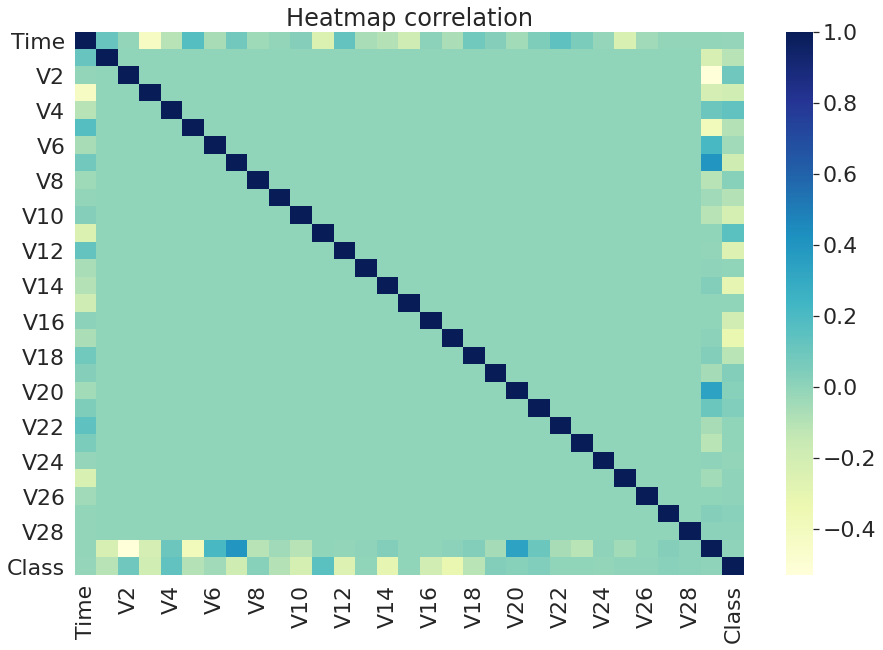

In [ ]:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [ ]:
rank = df_corr['Class'] # Retrieving the correlation coefficients per feature in relation to the feature class
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False) # Ranking the absolute values of the coefficients
                                                                  # in descending order
df_rank.dropna(inplace=True) # Removing Missing Data (not a number)

#Data Selection

In [ ]:
df_train_all = df[0:150000] # We cut in two the original dataset
df_train_1 = df_train_all[df_train_all['Class'] == 1] # We seperate the data which are the frauds and the no frauds
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) +" frauds so we need to take a similar number of non-fraud")

df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) # We gather the frauds with the no frauds. 
df_train = df_train.sample(frac=1) # Then we mix our dataset


In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


In [ ]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

#The model learn correctly

In [ ]:
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [ ]:
X_train_rank = df_train[df_rank.index[1:11]] # We take the first ten ranked features
X_train_rank = np.asarray(X_train_rank)

In [ ]:
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

#Confusion Matrix

In [ ]:
class_names=np.array(['0','1']) 
# Binary label, Class = 1 (fraud) and Class = 0 (no fraud)

In [ ]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = 'd' 
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
      horizontalalignment="center",
      color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

#Model Selection

##SVM model classifier

In [ ]:
classifier = svm.SVC(kernel='linear') 
# the default SVM Classifier (Kernel = Radial Basis Function)

In [ ]:
classifier.fit(X_train, y_train) 
# Then we train our model, with our balanced data train.

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#Testing the model

In [ ]:
prediction_SVM_all = classifier.predict(X_test_all) 
#And finally, we predict our data test.

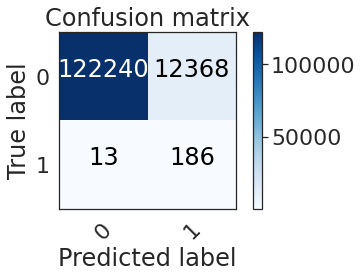

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9293702111184972


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 186 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9346733668341709
the accuracy is : 0.9081575882558027


#Final Result


In [ ]:
classifier.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier.predict(X_test_all_rank) #And finally, we predict our data test.

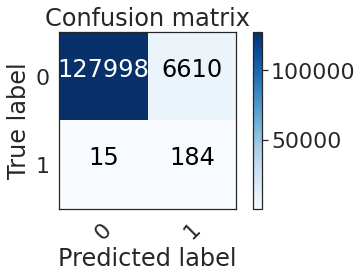

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Our criterion give a result of ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9298696260087891


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 184 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9246231155778895
the accuracy is : 0.9508556677323878


#3D Plot On SVM(Non Linear)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
import plotly.graph_objects as go
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.datasets import make_gaussian_quantiles# Construct dataset
X1, y1 = make_gaussian_quantiles(cov=1.,
                                 n_samples=1000, n_features=2,
                                 n_classes=2, random_state=1)
x1 = pd.DataFrame(X1,columns=['x','y'])
y1 = pd.Series(y1)

In [ ]:
x1=x1.values

In [ ]:
trace = go.Scatter(x=x1[:,0],y=x1[:,1],mode='markers',marker = dict(size = 12,color = y1,colorscale = 'Viridis'))
data=[trace]

layout = go.Layout()
fig = go.Figure(data=data,layout=layout)
fig.show()

In [ ]:
r = np.exp(-(x1 ** 2).sum(1)* 0.3)    ## exp(-gamma|x1-x2|**2) here gamma 0.3

In [ ]:
trace1 = go.Scatter3d(x=x1[:,0], y=x1[:,1],z=r,mode='markers',marker = dict(size = 3,color = y1,colorscale = 'Viridis')) 
data=[trace1]
fig = go.Figure(data=data,layout={})
fig.show()

In [ ]:
x1 = np.insert(x1,2,r,axis=1)

In [ ]:
model = LinearSVC(C=1.0, loss='hinge')
clf = model.fit(x1, y1)

Z = lambda X,Y: (-clf.intercept_[0]-clf.coef_[0][0]*X-clf.coef_[0][1]*Y) / clf.coef_[0][2]
# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)

trace1 = go.Mesh3d(x = x1[:,0], y = x1[:,1], z = Z(x1[:,0],x1[:,1])) ## for separating plane
trace2 = go.Scatter3d(x=x1[:,0], y=x1[:,1],z=x1[:,2],mode='markers',marker = dict(size = 3,color = y1,colorscale = 'Viridis')) ## for vector plots
data=[trace1,trace2]
fig = go.Figure(data=data,layout={})
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



# Different kernels in SVMs - 2D

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

X1_sepal = iris.data[:,[0,1]]
X2_petal = iris.data[:,[2,3]]
y = iris.target

print(X1_sepal[1:5,:])
print(X2_petal[1:5,:])
print(y)

[[4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
[[1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Text(0, 0.5, 'Petal width')

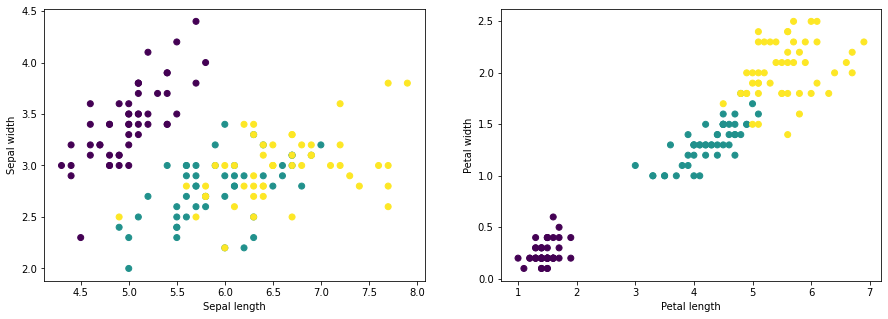

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.scatter(X1_sepal[:, 0], X1_sepal[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.subplot(1,2,2)
plt.scatter(X2_petal[:, 0], X2_petal[:, 1], c=y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    # Initialise the marker types and colors
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    color_Map = ListedColormap(colors[:len(np.unique(y))]) #we take the color mapping correspoding to the 
                                                            #amount of classes in the target data
    
    # Parameters for the graph and decision surface
    x1_min = X[:,0].min() - 1
    x1_max = X[:,0].max() + 1
    x2_min = X[:,1].min() - 1
    x2_max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot samples
    X_test, Y_test = X[test_idx,:], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = color_Map(idx),
                    marker = markers[idx], label = cl
        )

# Splitting and scaling the dataset


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#######################################################################
## SPLITTING


X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(X1_sepal,y,test_size=0.3,random_state=0)

print("# training samples sepal: ", len(X_train_sepal))
print("# testing samples sepal: ", len(X_test_sepal))

X_train_petal, X_test_petal, y_train_petal, y_test_petal = train_test_split(X2_petal,y,test_size=0.3,random_state=0)

print("# training samples petal: ", len(X_train_petal))
print("# testing samples petal: ", len(X_test_petal))

#####################################################################
## SCALING

sc = StandardScaler()
X_train_sepal_std = sc.fit_transform(X_train_sepal)
X_test_sepal_std = sc.transform(X_test_sepal)
sc = StandardScaler()
X_train_petal_std = sc.fit_transform(X_train_petal)
X_test_petal_std = sc.transform(X_test_petal)

#####################################################################
## COMBINING FOR FUTURE PLOTTING

X_combined_sepal_standard = np.vstack((X_train_sepal_std,X_test_sepal_std))
Y_combined_sepal = np.hstack((y_train_sepal, y_test_sepal))

X_combined_petal_standard = np.vstack((X_train_petal_std,X_test_petal_std))
Y_combined_petal = np.hstack((y_train_petal, y_test_petal))


# training samples sepal:  105
# testing samples sepal:  45
# training samples petal:  105
# testing samples petal:  45


## 1. SVM with LINEAR kernel

### 1.1. Sepal decision regions with linear kernel

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

   C_parameter  Accuracy
0         0.01       0.6
1         0.10  0.777778
2         1.00       0.8
3        10.00       0.8
4       100.00       0.8


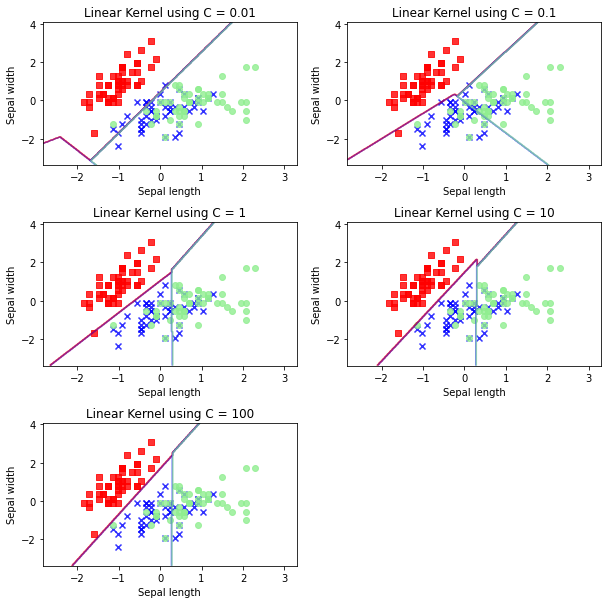

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C_param_range = [0.01,0.1,1,10,100]

sepal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
sepal_acc_table['C_parameter'] = C_param_range

plt.figure(figsize=(10, 10))

j = 0

for i in C_param_range:
    
    # Apply SVM model to training data
    svm_linear =  SVC(kernel = 'linear', C = i, random_state = 0)
    svm_linear.fit(X_train_sepal_std,y_train_sepal)
    
    # Predict using model
    y_pred_sepal = svm_linear.predict(X_test_sepal_std)
    
    # Saving accuracy score in table
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1
    
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_sepal_standard
                      , y = Y_combined_sepal
                      , classifier = svm_linear
                      , test_idx = range(105,150))
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Linear Kernel using C = %s'%i)
    
print(sepal_acc_table)


### 1.2. Petal decision regions with linear kernel

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

   C_parameter  Accuracy
0         0.01       0.6
1         0.10  0.955556
2         1.00  0.977778
3        10.00  0.977778
4       100.00  0.977778


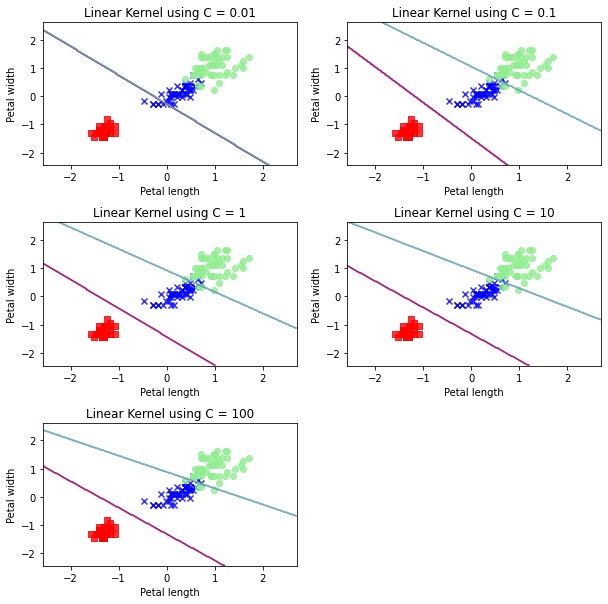

In [ ]:
petal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
petal_acc_table['C_parameter'] = C_param_range

plt.figure(figsize=(10, 10))

j = 0

for i in C_param_range:
    
    # Apply SVM model to training data
    svm_linear =  SVC(kernel = 'linear', C = i, random_state = 0)
    svm_linear.fit(X_train_petal_std,y_train_petal)
    
    # Predict using model
    y_pred_petal = svm_linear.predict(X_test_petal_std)
    
    # Saving accuracy score in table
    petal_acc_table.iloc[j,1] = accuracy_score(y_test_petal,y_pred_petal)
    j += 1
    
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_petal_standard
                      , y = Y_combined_petal
                      , classifier = svm_linear
                      , test_idx = range(105,150))
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('Linear Kernel using C = %s'%i)
    
print(petal_acc_table)


### 1.3. Validation curves for both datasets

In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'

   C_parameter  Train_scores  Test_scores  Difference
0         0.01      0.781667     0.773333    0.008333
1         0.10      0.798333     0.780000    0.018333
2         1.00      0.806667     0.780000    0.026667
3        10.00      0.816667     0.780000    0.036667
4       100.00      0.818333     0.766667    0.051667
5      1000.00      0.818333     0.766667    0.051667
   C_parameter  Train_scores  Test_scores  Difference
0         0.01      0.960000     0.960000    0.000000
1         0.10      0.963333     0.960000    0.003333
2         1.00      0.960000     0.960000    0.000000
3        10.00      0.966667     0.960000    0.006667
4       100.00      0.963333     0.960000    0.003333
5      1000.00      0.963333     0.953333    0.010000


(0.0, 1.0)

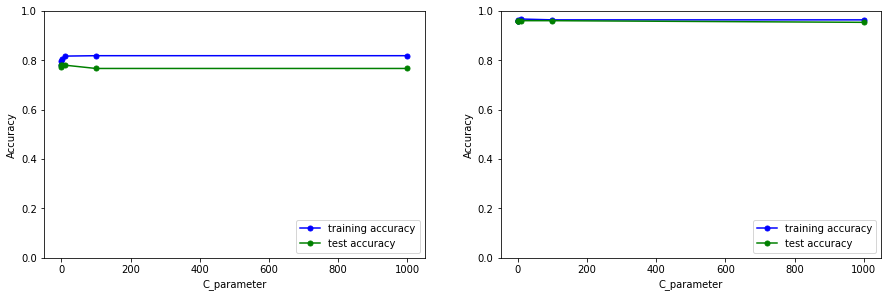

In [ ]:
from sklearn.model_selection import GridSearchCV, validation_curve

C_param_range = [0.01,0.1,1,10,100,1000]

plt.figure(figsize=(15, 10))

# SEPAL Plot validation curve
train_sepal_scores, test_sepal_scores = validation_curve(estimator=svm_linear
                                                            ,X=X_combined_sepal_standard
                                                            ,y=Y_combined_sepal
                                                            ,param_name='C'
                                                            ,param_range=C_param_range
                                                            ,scoring='accuracy'
                                                            )


train_sepal_mean = np.mean(train_sepal_scores,axis=1)
train_sepal_std = np.std(train_sepal_scores,axis=1)
test_sepal_mean = np.mean(test_sepal_scores,axis=1)
test_sepal_std = np.std(test_sepal_scores,axis=1)
best_C_table_sepal = pd.DataFrame(columns = ['C_parameter','Train_scores','Test_scores','Difference'])
best_C_table_sepal['C_parameter'] = C_param_range
best_C_table_sepal['Train_scores'] = train_sepal_mean
best_C_table_sepal['Test_scores'] = test_sepal_mean
best_C_table_sepal['Difference'] = best_C_table_sepal['Train_scores'] - best_C_table_sepal['Test_scores']

print(best_C_table_sepal)

plt.subplot(2,2,1)
plt.plot(C_param_range
            ,train_sepal_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot(C_param_range
            ,test_sepal_mean
            ,color='green'
            ,marker='o'
            ,markersize=5
            ,label='test accuracy')
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0,1])

# PETAL Plot validation curve
train_petal_scores, test_petal_scores = validation_curve(estimator=svm_linear
                                                            ,X=X_combined_petal_standard
                                                            ,y=Y_combined_petal
                                                            ,param_name='C'
                                                            ,param_range=C_param_range
                                                            ,scoring='accuracy'
                                                            )


train_petal_mean = np.mean(train_petal_scores,axis=1)
train_petal_std = np.std(train_petal_scores,axis=1)
test_petal_mean = np.mean(test_petal_scores,axis=1)
test_petal_std = np.std(test_petal_scores,axis=1)

best_C_table_petal = pd.DataFrame(columns = ['C_parameter','Train_scores','Test_scores','Difference'])
best_C_table_petal['C_parameter'] = C_param_range
best_C_table_petal['Train_scores'] = train_petal_mean
best_C_table_petal['Test_scores'] = test_petal_mean
best_C_table_petal['Difference'] = best_C_table_petal['Train_scores'] - best_C_table_petal['Test_scores']
print(best_C_table_petal)

plt.subplot(2,2,2)
plt.plot(C_param_range
            ,train_petal_mean
            ,color='blue'
            ,marker='o'
            ,markersize=5
            ,label='training accuracy')
    
plt.plot(C_param_range
            ,test_petal_mean
            ,color='green'
            ,marker='o'
            ,markersize=5
            ,label='test accuracy') 
    
plt.xlabel('C_parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0,1])

# 2. SVM with POLYNOMIAL kernel

### 2.1 Sepal decision regions

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

   degree  Accuracy
0       1       0.8
1       2  0.644444
2       3  0.666667
3       4  0.422222
4       5  0.644444
5       6       0.4


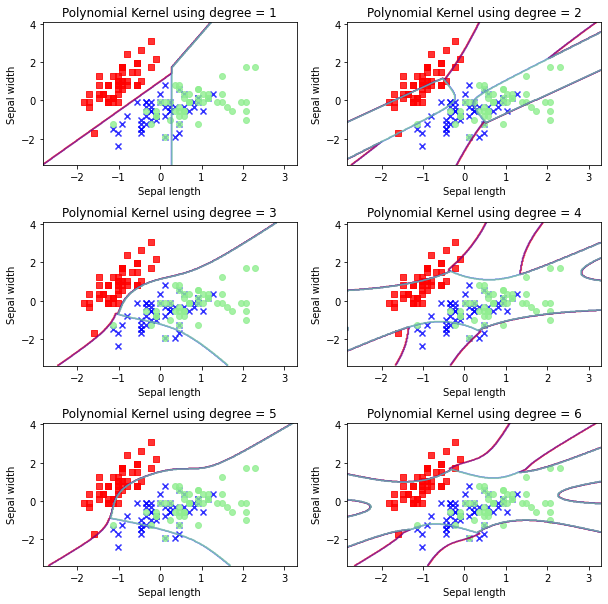

In [ ]:
polynomial_degree_range = [1,2,3,4,5,6] 

sepal_acc_table = pd.DataFrame(columns = ['degree','Accuracy'])
sepal_acc_table['degree'] = polynomial_degree_range

plt.figure(figsize=(10, 10))

j = 0

for i in polynomial_degree_range:
    
    # Apply SVM model to training data
    svm_poly =  SVC(kernel = 'poly', degree = i, C = 1, random_state = 0)
    svm_poly.fit(X_train_sepal_std,y_train_sepal)
    
    # Predict using model
    y_pred_sepal = svm_poly.predict(X_test_sepal_std)
    
    # Saving accuracy score in table
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_sepal_standard
                      , y = Y_combined_sepal
                      , classifier = svm_poly
                      )
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Polynomial Kernel using degree = %s'%i)
    
print(sepal_acc_table)

### 2.2 Petal decision regions

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

   degree  Accuracy
0       1  0.977778
1       2  0.866667
2       3  0.933333
3       4  0.844444
4       5  0.933333
5       6  0.777778


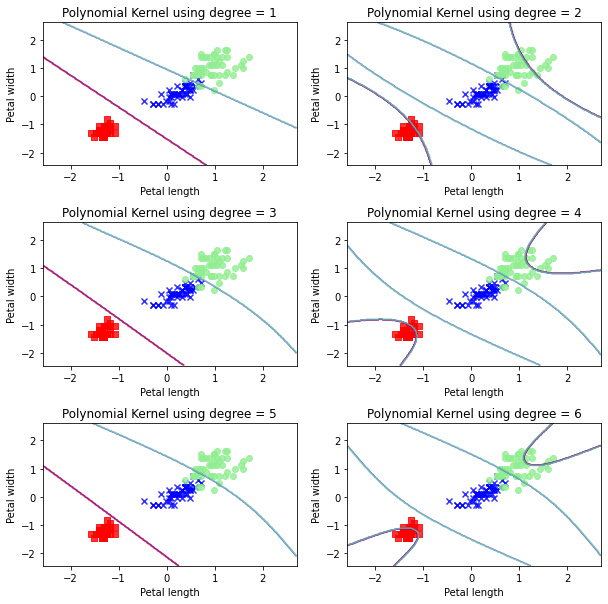

In [ ]:
polynomial_degree_range = [1,2,3,4,5,6] 

petal_acc_table = pd.DataFrame(columns = ['degree','Accuracy'])
petal_acc_table['degree'] = polynomial_degree_range

plt.figure(figsize=(10, 10))

j = 0

for i in polynomial_degree_range:
    
    # Apply SVM model to training data
    svm_poly =  SVC(kernel = 'poly', degree = i, C = 1, random_state = 0)
    svm_poly.fit(X_train_petal_std,y_train_petal)
    
    # Predict using model
    y_pred_petal = svm_poly.predict(X_test_petal_std)
    
    # Saving accuracy score in table
    petal_acc_table.iloc[j,1] = accuracy_score(y_test_petal,y_pred_petal)
    j += 1
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_petal_standard
                      , y = Y_combined_petal
                      , classifier = svm_poly
                      , test_idx = range(105,150))
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('Polynomial Kernel using degree = %s'%i)
    
print(petal_acc_table)


# 3. SVM with RADIAL BASIS FUNCTION kernel

### 3.1 Sepal decision regions

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

   degree  Accuracy
0       1  0.777778
1       2  0.777778
2       3  0.777778
3       4  0.777778
4       5  0.777778
5       6  0.777778


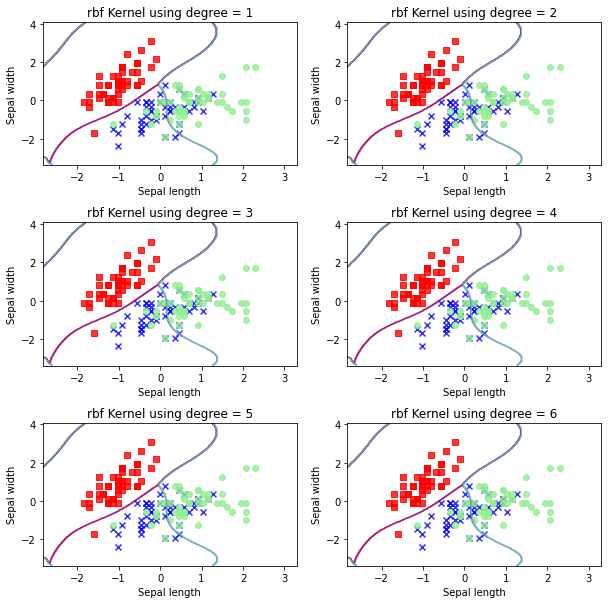

In [ ]:
rbf_degree_range = [1,2,3,4,5,6]

sepal_acc_table = pd.DataFrame(columns = ['degree','Accuracy'])
sepal_acc_table['degree'] = rbf_degree_range

plt.figure(figsize=(10, 10))

j = 0

for i in rbf_degree_range:
    
    # Apply SVM model to training data
    svm_rbf =  SVC(kernel = 'rbf', degree = i, C = 1, random_state = 0)
    svm_rbf.fit(X_train_sepal_std,y_train_sepal)
    
    # Predict using model
    y_pred_sepal = svm_rbf.predict(X_test_sepal_std)
    
    # Saving accuracy score in table
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_sepal_standard
                      , y = Y_combined_sepal
                      , classifier = svm_rbf
                      )
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('rbf Kernel using degree = %s'%i)
    
print(sepal_acc_table)

###  3.2. Petal decision regions

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

   degree  Accuracy
0       1  0.977778
1       2  0.977778
2       3  0.977778
3       4  0.977778
4       5  0.977778
5       6  0.977778


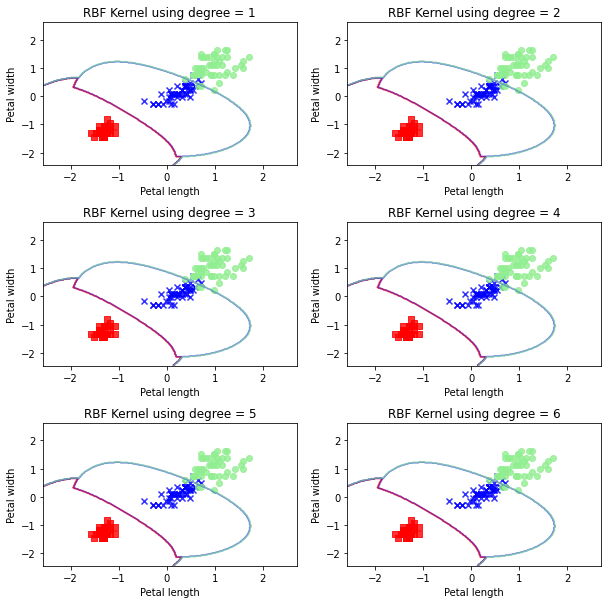

In [ ]:
rbf_degree_range = [1,2,3,4,5,6] 

petal_acc_table = pd.DataFrame(columns = ['degree','Accuracy'])
petal_acc_table['degree'] = rbf_degree_range



plt.figure(figsize=(10, 10))

j = 0

for i in rbf_degree_range:
    
    # Apply SVM model to training data
    svm_rbf =  SVC(kernel = 'rbf', degree = i, C = 1, random_state = 0)
    svm_rbf.fit(X_train_petal_std,y_train_petal)
    
    # Predict using model
    y_pred_petal = svm_rbf.predict(X_test_petal_std)
    
    # Saving accuracy score in table
    petal_acc_table.iloc[j,1] = accuracy_score(y_test_petal,y_pred_petal)
    j += 1
    # Printing decision regions
    plt.subplot(3,2,j)
    plt.subplots_adjust(hspace = 0.4)
    plot_decision_regions(X = X_combined_petal_standard
                      , y = Y_combined_petal
                      , classifier = svm_rbf
                      , test_idx = range(105,150))
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('RBF Kernel using degree = %s'%i)
    
print(petal_acc_table)

